In [1]:
#Libraries
from matplotlib import pyplot
from numpy import savez_compressed, asarray, load
from mtcnn.mtcnn import MTCNN
from keras.models import load_model
from numpy import load
from numpy import expand_dims
from PIL import Image
from ipywidgets import FileUpload
import numpy as np
from matplotlib import pyplot
from matplotlib.patches import Rectangle
import joblib
import cv2


# Load models
path_to_model = "../models/facenet_keras.h5"
model = load_model(path_to_model) #facenet
svc_model = joblib.load('svc.sav') #SVC

In [2]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
	# load image from file
	image = Image.open(filename)
	# convert to RGB, if needed
	image = image.convert('RGB')
	# convert to array
	pixels = asarray(image)
	# create the detector, using default weights
	detector = MTCNN()
	# detect faces in the image
	results = detector.detect_faces(pixels)
	# extract the bounding box from the first face
	x1, y1, width, height = results[0]['box']
	# bug fix
	x1, y1 = abs(x1), abs(y1)
	x2, y2 = x1 + width, y1 + height
	# extract the face
	face = pixels[y1:y2, x1:x2]
	# resize pixels to the model size
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array

# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	return yhat[0] 

labels = ("Ben Affleck", "Elton John", "Jerry Seinfield", "Madonna", "Mindy Kaling")
confidence = []
a = []
      
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# set labes
		if result != result_list[0]:                                       
			ax.text(x,y - 1, "Unknown", fontsize = 13, color = 'red')
		else:
			for i in range(len(labels)):
				if class_index == i:
					ax.text(x,y - 1,labels[i], fontsize = 13,color = 'red') 
#		cv2.putText(data, "rect", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 4, (0, 0, 255), 4)
        
#			 		name = labels[i]
#			 		cv2.putText(data, name, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.60, (0, 0, 0), 1) 
#		if class_index != i:
#			cv2.putText(data, 'Unknown', (x,y), cv2.FONT_HERSHEY_SIMPLEX, 0.60, (0, 0, 0), 1)       
#	# show the plot
#	cv2.imshow("Detected faces", data)
	#pyplot.imshow()    
    # T0 load and hold the image
#	cv2.waitKey(0)
    # To close the window after the required kill value was provided
#	cv2.destroyAllWindows()
	pyplot.show()

In [3]:
# load image from file
path = 'Inferencias/Inferencias/jerry_familia.jpg'
filename = Image.open(path)
width, height = filename.size
if width >= 2000 and height >= 1270:
    newsize = (752, 478)
    filename = filename.resize(newsize)
    filename.save('Inferencias/Inferencias/resize.jpg')
    filename = 'Inferencias/Inferencias/resize.jpg'
    pixels = pyplot.imread(filename)
else:
    filename = path
    pixels = pyplot.imread(filename)

#[filename] = upload.value
#pixels = filename

# create the detector, using default weights
detector = MTCNN()

# detect faces in the image

faces = detector.detect_faces(pixels)
# Extract faces in image
picture = extract_face(filename, required_size=(160, 160))
savez_compressed('picture.npz', picture)

# convert each face in the train set to an embedding
newTrainX = list()
embedding = get_embedding(model, picture)
newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print(newTrainX.shape)

# save arrays to one file in compressed format
savez_compressed('picture-embeddings.npz', newTrainX)

(1, 128)


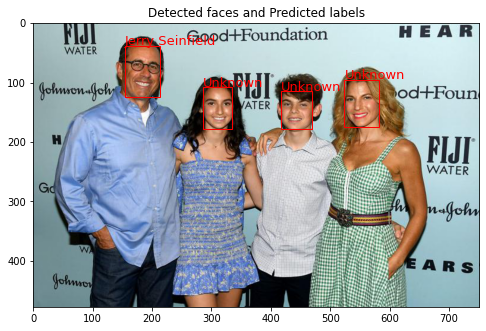

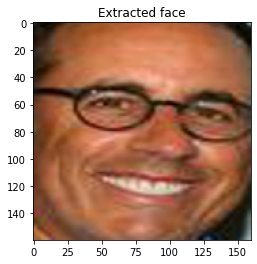

This is: Jerry Seinfield
Class number: 2
Class probability: 99.99999


In [4]:
# prediction for the face
yhat_class = svc_model.predict(newTrainX)
yhat_prob = svc_model.predict_proba(newTrainX)

# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100

# plot for fun
f, ax = pyplot.subplots(1, 1, sharex=True, figsize=(8, 6)) 
title = ('Detected faces and Predicted labels')
pyplot.title(title)
draw_image_with_boxes(filename, faces)
title_2 = ('Extracted face')
pyplot.title(title_2)
pyplot.imshow(picture)
pyplot.show()

labels = ("Ben Affleck", "Elton John", "Jerry Seinfield", "Madonna", "Mindy Kaling") 

for i in range(len(labels)):
    if class_index == i:
        print('This is:' + " " + str(labels[i]))
        
print('Class number:'  + ' ' + str(class_index))
print('Class probability:'  + ' ' + str(round(class_probability, 5)))

In [5]:
from ipywidgets import FileUpload
upload = FileUpload()
display(upload)

FileUpload(value={}, description='Upload')

In [6]:
[uploaded_file] = upload.value
#uploaded_file[0].tobytes()
b = upload.data

ValueError: not enough values to unpack (expected 1, got 0)

In [7]:
im = pyplot.imread('Inferencias/' + uploaded_file)

pixels = upload

NameError: name 'uploaded_file' is not defined

In [ ]:
import os

p = os.path.abspath(b)
p

In [ ]:
pyplot.imshow(im)

In [ ]:
import shutil
#shutil.copy(uploaded_file, 'Inferencias/test')